
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: September 30, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Matthew Ruffner 
2. Kaiwen Zhang (kz4493)

# Question 1 (Understanding ElasticNet, 30 points)
Although lots of past studies have been conducted on factors affecting life expectancy using demographic variables, income composition and mortality rates, it was found that the effect of immunization and human development index was not taken into account. Hence, this motivates us to resolve this factor by formulating a regression model based on mixed effects model and multiple linear regression while considering data from 2014 for all countries. Here, important immunization like Hepatitis B, Polio and Diphtheria will also be considered. 

This dataset was taken from https://www.kaggle.com/kumarajarshi/life-expectancy-who.

**Please use Python 3.6+ for this assignment.**

First, we import packages and clean up the obtained dataset. We consider the `Life Expectancy` variable as the dependant variable whereas others are assumed to be independent variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("life.csv", index_col=0)
print(df.shape)
df = df.loc[df['Year']==2014, :]
df = df.drop('Year', axis=1)
df = pd.get_dummies(df, columns=['Status'])
df = df.dropna()
print(df.shape)

(2938, 21)
(131, 21)


In [3]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
Albania,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,...,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,0,1
Algeria,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,...,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,0,1
Angola,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,...,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,0,1
Argentina,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,...,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3,0,1


In [4]:
# Creating training and testing dataset
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

## Question 1.1 (5 points) 
Run Linear regression on the train dataset and print the $R^2$ values measured on (a) the training dataset and (b) the test dataset.

## Answer 1.1

In [5]:
reg = LinearRegression().fit(X_train, y_train)

from sklearn.metrics import r2_score

print('Training:', r2_score(y_train.values, reg.predict(X_train)))
print('Test:', r2_score(y_test.values, reg.predict(X_test)))


Training: 0.8869822224758938
Test: 0.83550552336316


## Question 1.2 (8 points) 
Run linear regression using Lasso and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model. Finally, store the best model separately. Also, use the co-efficients obtained and select the [columns with non-zero weights](https://stackoverflow.com/questions/62323713/selecting-columns-of-dataframe-where-lasso-coefficient-is-nonzero) and use them to create `X_train_lasso` and `X_test_lasso`. Show how many non-zero columns are present.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.2

In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
scaler.fit(X_test)
X_scaled_test = scaler.transform(X_test)
    
# X_scaled_train = preprocessing.scale(X_train, axis=0, with_mean=True, with_std=True, copy=True)
# X_scaled_test = preprocessing.scale(X_test, axis=0, with_mean=True, with_std=True, copy=True)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=42, normalize=True, copy_X=True)
alphas = 10**np.linspace(1,-2,100)*0.5


r2_list = []

for i in alphas:
    lasso.set_params(alpha=i)
    lasso_fit = lasso.fit(X_scaled_train, y_train)
    lasso_pred = lasso_fit.predict(X_scaled_test)
    r2 = r2_score(y_test, lasso_pred)
    r2_list.append(r2)
    
best_index = r2_list.index(np.max(r2_list))
print('Best lambda:', alphas[best_index])
print('Best R^2:', r2_list[best_index])

Best lambda: 0.046630167344161
Best R^2: 0.7326606923177987


In [8]:
alphas_1 = 10**np.linspace(1,-2,100)*0.5
lassomodel_test = LassoCV(alphas = alphas_1).fit(X_scaled_test, y_test)
lassomodel_test.coef_

array([-0.96798814, -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.01535791, -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  5.66885667,  0.        ,  0.        , -0.        ])

In [9]:
lassomodel_train = LassoCV(alphas = alphas_1).fit(X_scaled_train, y_train)
lassomodel_train.coef_

array([-1.93119285, -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.54905518,
        0.06237773, -1.28969304,  0.        ,  0.        , -0.        ,
       -0.01397913,  5.10994621,  0.        ,  0.10116477, -0.        ])

In [10]:
X_scaled_test_lasso = X_scaled_test[:,lassomodel_test.coef_!=0]
X_scaled_train_lasso = X_scaled_train[:,lassomodel_train.coef_!=0]

In [11]:
'There are ' + str(len(X_scaled_test_lasso[0])) + ' non-zero weights for the test set and ' + str(len(X_scaled_train_lasso[0]))+ \
' non-zero weights for the training set.'

'There are 3 non-zero weights for the test set and 7 non-zero weights for the training set.'

## Question 1.3 (6 points) 
Run linear regression using Ridge and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Ridge model.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.3

In [12]:
# lasso = Ridge(random_state=42, normalize=True, copy_X=True)
# alphas = 10**np.linspace(1,-2,100)*0.5

# tuned_parameters = [{'alpha': alphas}]
# n_folds = 5

# clf = GridSearchCV(lasso, tuned_parameters, scoring='r2', cv=n_folds, refit=False)
# clf.fit(X_scaled_test, y_test)

# print(clf.best_params_)
# print('R^2:', clf.best_score_)

ridge = Ridge(random_state=42, normalize=True, copy_X=True)
alphas = 10**np.linspace(1,-2,100)*0.5


r2_list = []

for i in alphas:
    ridge.set_params(alpha=i)
    ridge_fit = ridge.fit(X_scaled_train, y_train)
    ridge_pred = ridge_fit.predict(X_scaled_test)
    r2 = r2_score(y_test, ridge_pred)
    r2_list.append(r2)
    
best_index = r2_list.index(np.max(r2_list))
print('Best lambda:', alphas[best_index])
print('Best R^2:', r2_list[best_index])

Best lambda: 0.8148754173103222
Best R^2: 0.7066600746181262


## Question 1.4  (8 points) 
Run [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) [(Video Reference)](https://youtu.be/1dKRdX9bfIo) on the `X_train_lasso` dataset by using all possible values from the below mentioned parameter set:

    l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
    alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements
    normalize = True
    random_state = 42


Store the $R^2$ score obtained from `X_test_lasso` set for each combination in an array with 101 rows and 100 columns. e.g.

    arr[i][j] = curr_r2_score # obtained using l1_ratios[i] and alphas[j]

where `i` is the `ith` element from `l1_ratio` and `j` is the `jth` element from `alphas`. Print the best $R^2$ score obtained using test set and its corresponding `alpha` and `l1 ratio`.

In [13]:
 arr = np.zeros((101, 100)) # Create 101x100 array

Note that by varying the `l1_ratio`, you are controlling the ratio of Lasso and Ridge regularization that is present in the model. When `l1_ratio = 1`, it means that the model uses Lasso regularization only whereas when `l1_ratio = 0`, it means that the model uses Ridge regularization only. You can find the formula for the loss function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

## Answer 1.4

In [14]:
from sklearn.linear_model import ElasticNet

l1_ratio = np.arange(0, 1.01, 0.01)
alpha = 10**np.linspace(1, -2, 100)*0.5

enet = ElasticNet(random_state=42, normalize=True)

tuned_parameters = [{'l1_ratio': l1_ratio,'alpha': alpha}]
n_folds = 5

clf = GridSearchCV(enet, tuned_parameters, scoring='r2', cv=n_folds, refit=False)
clf.fit(X_scaled_train_lasso, y_train)

print(clf.best_params_)
print('R^2:', clf.best_score_)

{'alpha': 0.03289666123287841, 'l1_ratio': 1.0}
R^2: 0.8517129937124203


In [15]:
l1_ratios = list(np.arange(0, 1.01, 0.01))
alphas = list(10**np.linspace(1, -2, 100)*0.5)
for i in l1_ratios:
    for j in alphas:
        enet = ElasticNet(normalize = True, alpha = j, l1_ratio = i, random_state = 42)
        enet.fit(X_scaled_test_lasso, y_test)
        arr[l1_ratios.index(i)][alphas.index(j)] = r2_score(y_test.values, enet.predict(X_scaled_test_lasso))
arr

array([[0.0244346 , 0.02615652, 0.02799646, ..., 0.83898714, 0.84017361,
        0.84125448],
       [0.02363894, 0.0253798 , 0.02723991, ..., 0.83916054, 0.8403318 ,
        0.84139859],
       [0.02282687, 0.02458707, 0.02646779, ..., 0.83933339, 0.84048957,
        0.84154229],
       ...,
       [0.        , 0.        , 0.        , ..., 0.85077622, 0.85078096,
        0.85078506],
       [0.        , 0.        , 0.        , ..., 0.85078687, 0.8507902 ,
        0.8507931 ],
       [0.        , 0.        , 0.        , ..., 0.85079324, 0.85079574,
        0.85079791]])

In [16]:
max_r2 = 0
max_i = 0
max_j = 0

for i in range(len(arr)):
    for j in range(len(arr[i])):
        if arr[i][j] > max_r2:
            max_r2 = arr[i][j]
            max_i = i
            max_j = j
            
print('Best R^2 value:', max_r2)
print('Best l1_ratio:', l1_ratios[max_i])
print('Best alpha:', alphas[max_j])

Best R^2 value: 0.8507979136357258
Best l1_ratio: 1.0
Best alpha: 0.005


## Question 1.5 (3 points) 
Call `plot_heatmap()` using the 101x100 array (after flipping it horizontally using [np.fliplr()](https://numpy.org/doc/stable/reference/generated/numpy.fliplr.html)) from the previous question. What does this heatmap represent? Interpret the heatmap.

In [17]:
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

def format_y(value, tick_number):
    return f'{value/100.:0.2f}'

def format_x(value, tick_number):
    return f'{rescale(value, 0., 100., 0.05, 5.):0.2f}'

def plot_heatmap(arr):
    ax = sns.heatmap(arr)
    ax.set_ylabel("L1 Ratio")
    ax.set_xlabel("alpha")
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y))

## Answer 1.5

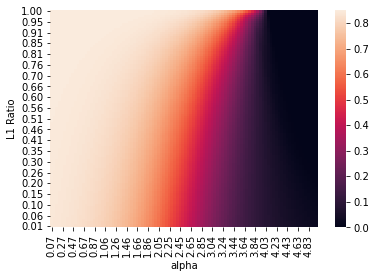

In [18]:
plot_heatmap(np.fliplr(arr))

Now that we have arranged the array in such a way that matches the axes labels, we see that R^2 values are very good basically for any alpha value less than 2 (light-brown color), as the color darkens to lower R^2 values along a roughly linear gradient drop.

# Question 2 (5 points)
Suppose you learn a ridge regression based on some of the independent variables available to you, and including a few interaction terms as well. Your result is disappointing, and you believe that the model is suffering from either too much bias or too much variance. Describe briefly how you will test which alternative is more likely to be true. (there is no extra data that you can use, so “get more data” is not an option).

## Answer 2

Instead of obtaining more data, a way to "artificially simulate" adding data would be to do a cross-validation. From this, it can be seen whether the model is overfitting or not. If it is, that may be a proxy for high variance; if all cross-validation errors turn out to be roughly equally high, that may be an indication of high bias.

# Question 3 Bias-Variance (20 pts): 

We want to build a model that can predict y for unknown inputs x.(15 pts)

(a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the train and test points on the same plot, clearly denoting the training and testing points. On the same figure, plot the predictions of the linear model using x_all. All the plots must be in the same figure and be clearly labeled.


(b) (10 pts) Fit polynomial models of degrees 2, 3, 4 and 12 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (train and test points) as before.  On the same figure, plot the predictions of the polynomial models using x_all. All the plots must be in the same figure and be clearly labeled.


(c) (5 pts) Which model performed the best? Explain.


* Use the below code to load the data from the file 'ps01.data'. It is organized as a dictionary, of train and test data.

In [19]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_all = np.linspace(-2,5,101).reshape(-1,1)
all_files = np.load("q3_data.npz")
x_train, y_train, x_test, y_test = all_files['arr_0'], all_files['arr_1'], all_files['arr_2'], all_files['arr_3']

### Answer

#### (a)

In [20]:
reg = LinearRegression().fit(x_train, y_train)

print('Test:', mean_squared_error(y_test, reg.predict(x_test)))

Test: 4.739110717634691


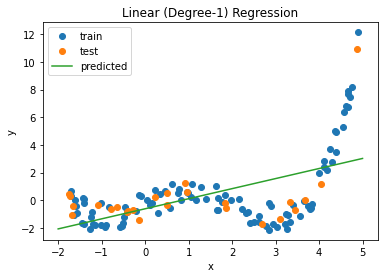

In [21]:
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, marker='o', linestyle='None', label='train')
plt.plot(x_test, y_test, marker='o', linestyle='None', label='test')
plt.plot(x_all, reg.predict(x_all), label='predicted')

plt.title('Linear (Degree-1) Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='best')

### (b)

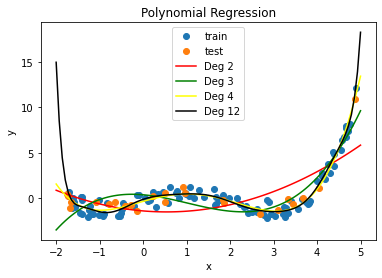

Train mean squared error degree 2: 3.241421853814466
Test mean squared error degree 2: 3.1186880128035512
Train mean squared error degree 3: 1.4201223351315242
Test mean squared error degree 3: 1.669870363950939
Train mean squared error degree 4: 0.37459501477803064
Test mean squared error degree 4: 0.2793974390234882
Train mean squared error degree 12: 0.3297484792265298
Test mean squared error degree 12: 0.40228761828867277


In [22]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
# degree 2
poly2 = PolynomialFeatures(degree = 2)
X_poly2 = poly2.fit_transform(x_train)
poly2.fit(X_poly2, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly2, y_train)

# degree 3
poly3 = PolynomialFeatures(degree = 3)
X_poly3 = poly3.fit_transform(x_train)
poly3.fit(X_poly3, y_train)
lin3 = LinearRegression()
lin3.fit(X_poly3, y_train)

# degree 4
poly4 = PolynomialFeatures(degree = 4)
X_poly4 = poly4.fit_transform(x_train)
poly4.fit(X_poly4, y_train)
lin4 = LinearRegression()
lin4.fit(X_poly4, y_train)

# degree 12
poly12 = PolynomialFeatures(degree = 12)
X_poly12 = poly12.fit_transform(x_train)
poly12.fit(X_poly12, y_train)
lin12 = LinearRegression()
lin12.fit(X_poly12, y_train)

plt.plot(x_train, y_train, marker='o', linestyle='None', label='train')
plt.plot(x_test, y_test, marker='o', linestyle='None', label='test')
plt.plot(x_all, lin2.predict(poly2.fit_transform(x_all)), color = 'red', label='Deg 2')
plt.plot(x_all, lin3.predict(poly3.fit_transform(x_all)), color = 'green', label='Deg 3')
plt.plot(x_all, lin4.predict(poly4.fit_transform(x_all)), color = 'yellow', label='Deg 4')
plt.plot(x_all, lin12.predict(poly12.fit_transform(x_all)), color = 'black', label='Deg 12')
plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

print('Train mean squared error degree 2:', mean_squared_error(y_train, lin2.predict(poly2.fit_transform(x_train))))
print('Test mean squared error degree 2:', mean_squared_error(y_test, lin2.predict(poly2.fit_transform(x_test))))
print('Train mean squared error degree 3:', mean_squared_error(y_train, lin3.predict(poly3.fit_transform(x_train))))
print('Test mean squared error degree 3:', mean_squared_error(y_test, lin3.predict(poly3.fit_transform(x_test))))
print('Train mean squared error degree 4:', mean_squared_error(y_train, lin4.predict(poly4.fit_transform(x_train))))
print('Test mean squared error degree 4:', mean_squared_error(y_test, lin4.predict(poly4.fit_transform(x_test))))
print('Train mean squared error degree 12:', mean_squared_error(y_train, lin12.predict(poly12.fit_transform(x_train))))
print('Test mean squared error degree 12:', mean_squared_error(y_test, lin12.predict(poly12.fit_transform(x_test))))

### (c)

Degree 4 clearly performed the best because its test error is the smallest and therefore fits the data the best without the factor of overfitting.

# Question 4 - Stochastic Gradient Descent (25 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD. (2pts) Report the MSE at the end of 15 epochs for the two best combinations.


## Answer 

In [131]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
class Regression:
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(4)
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate * gradient
        return self.coef
    #please fill this to update self.coef using SGD
    def fit(self, X, y, update_rule='sgd', plot=False):
        min_mse = 0
        mse = []
        coefs = []
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                preds = np.dot(self.coef, np.transpose(X[i]))
                error = preds - y[i]
                # Compute gradients
                gradient = np.zeros(X[i].shape)
                gradient[0] = error
                gradient[1] = error*X[i][1] + self.regularization*self.coef[1]
                gradient[2] = error*X[i][2] + self.regularization*self.coef[2]
                gradient[3] = error*X[i][3] + self.regularization*self.coef[3]
#               gradient = gradient + X[i]*(y[i]-(preds))
                # Update weights
                self.sgd(gradient)
            coefs.append(self.coef.copy())
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))
            min_mse = min(mse)
        self.lowest_mse = mse[-1]
#         best_index = mse.index(min_mse)
#         print(best_index)
        print(min_mse)
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        return x
    # compute dot product of self.coef and X
    def linearPredict(self, X):
        y_pred = np.dot(self.coef, np.transpose(X))
        return y_pred

In [132]:
data = pd.read_csv('q4_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

0.06473070746881703
0.06473070746881703
0.06473070746881703
0.03682051179745846
0.04038192103561114
0.04067131671978722
0.030495991520073523
0.0337059224933533
0.03379488516030139
0.027391087575201017
0.0338101579932851
0.03380480585561926
0.030926038458996715
0.03455309387648329
nan
2.39841845820463e+25
nan
nan
nan
nan
nan
nan
nan
nan


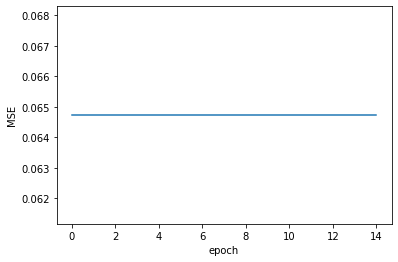

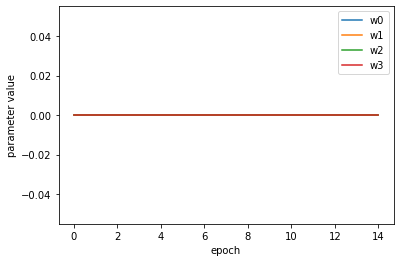

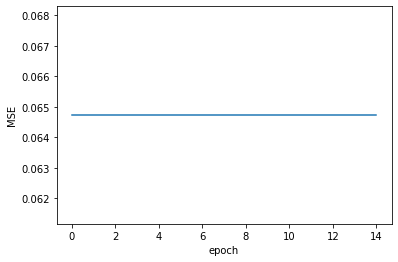

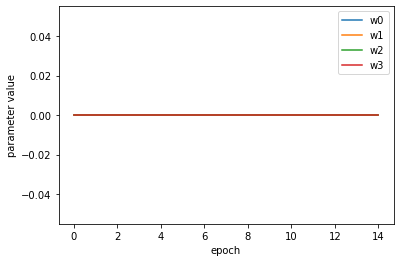

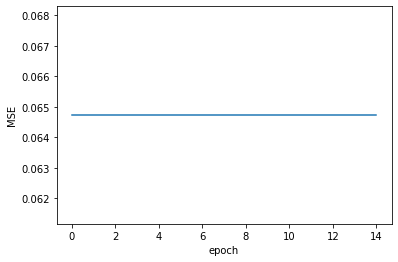

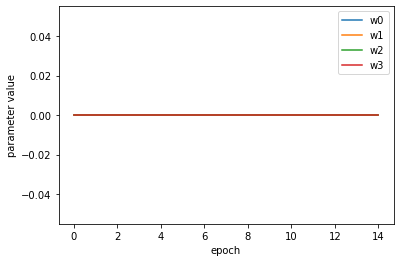

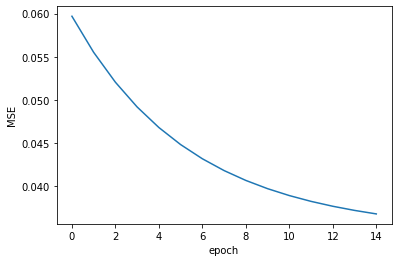

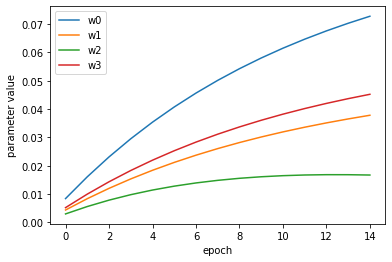

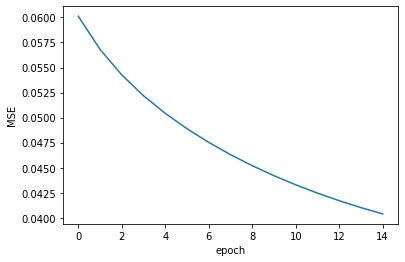

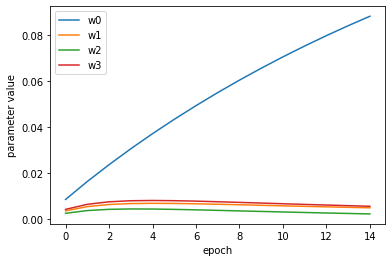

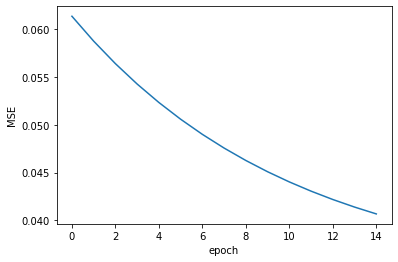

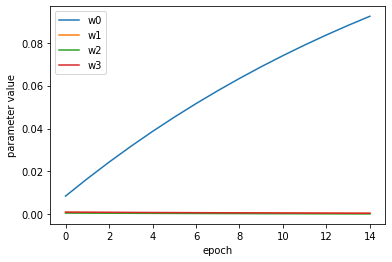

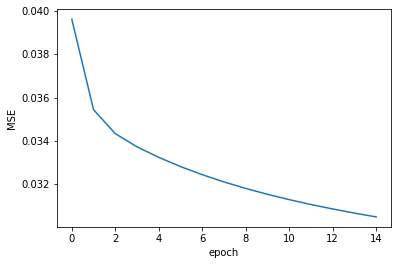

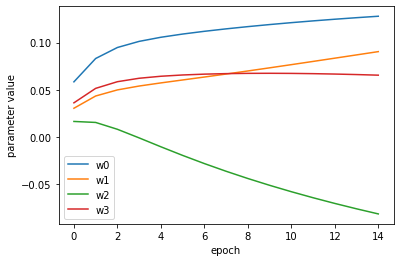

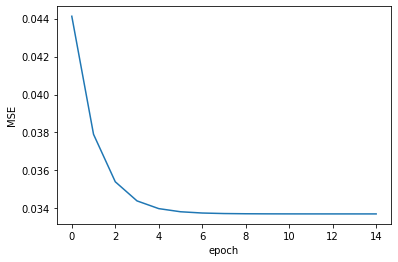

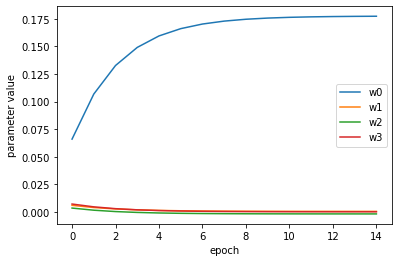

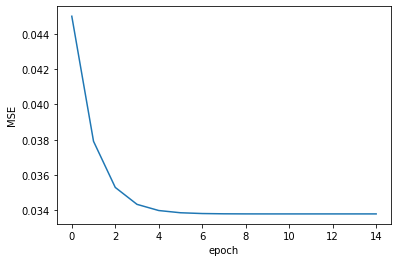

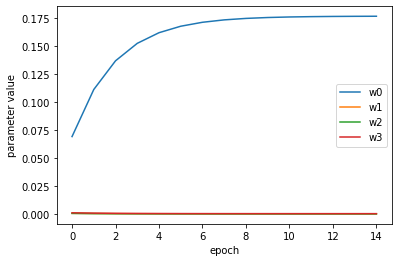

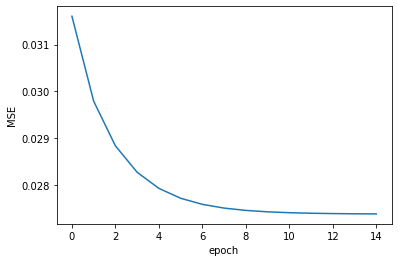

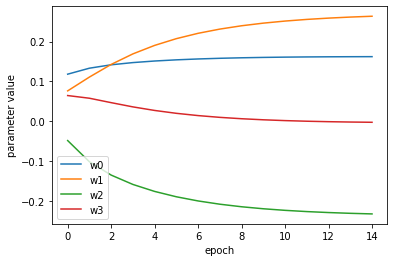

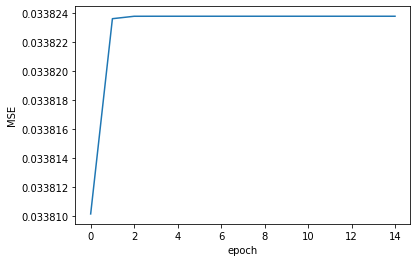

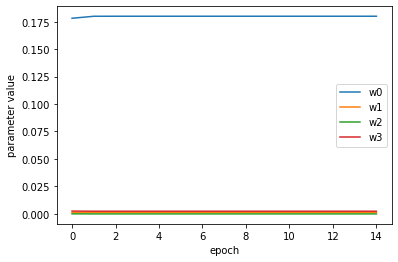

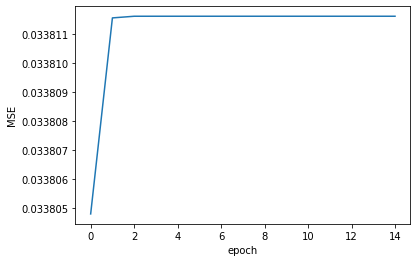

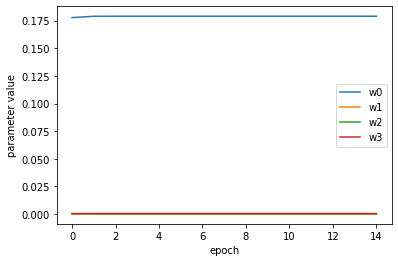

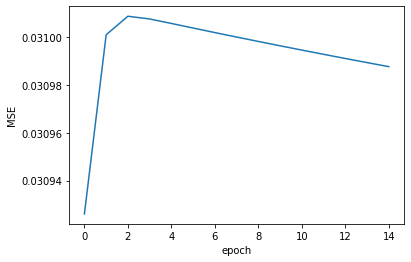

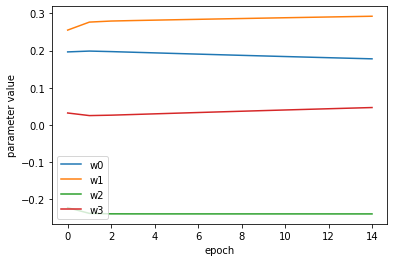

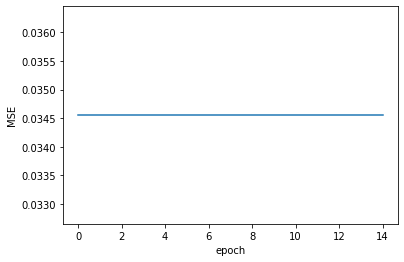

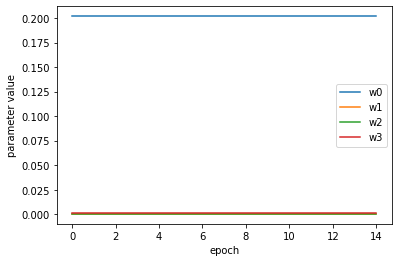

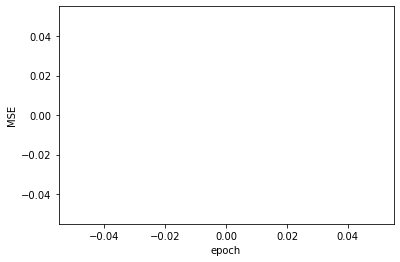

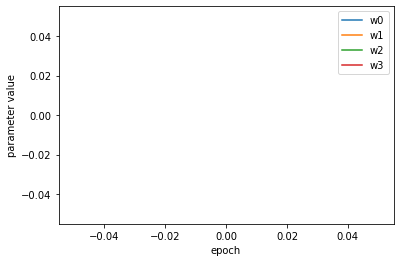

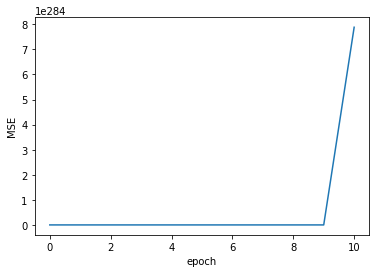

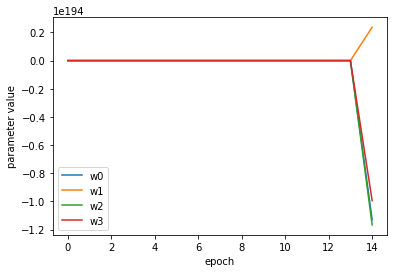

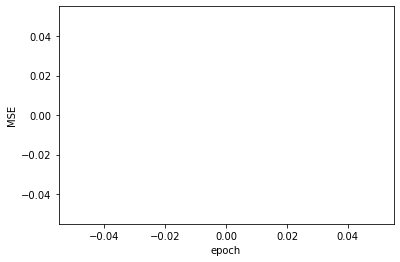

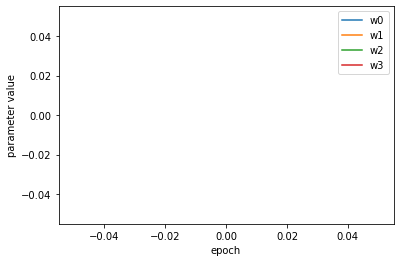

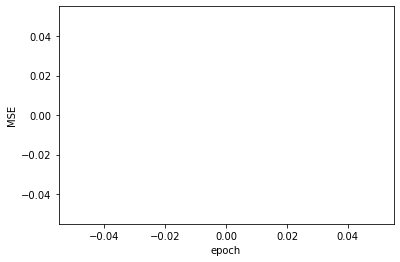

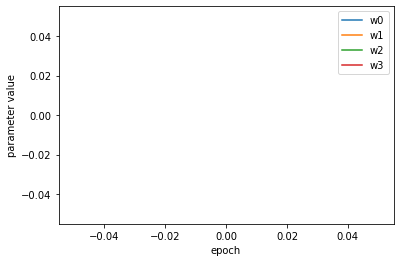

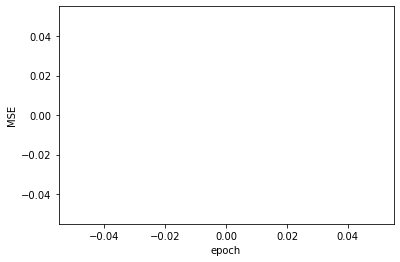

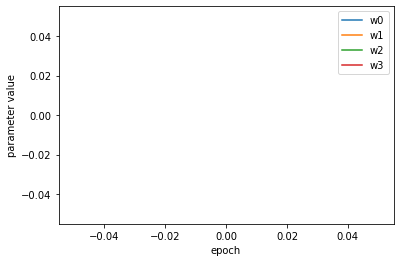

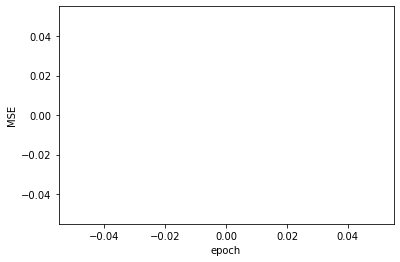

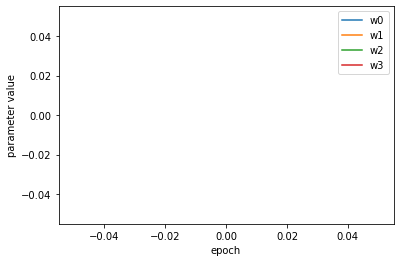

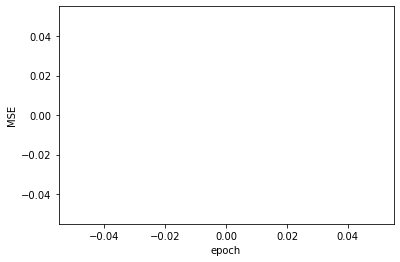

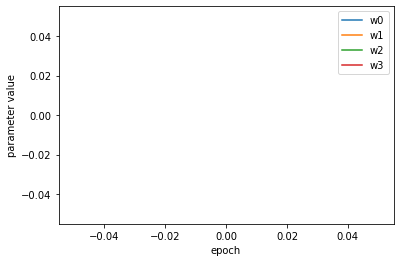

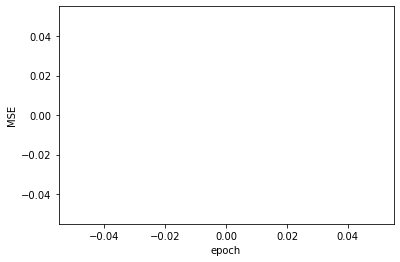

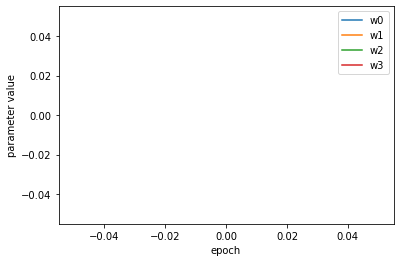

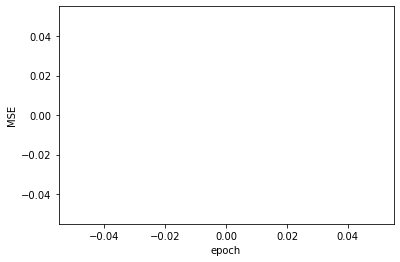

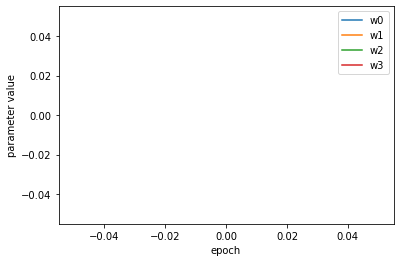

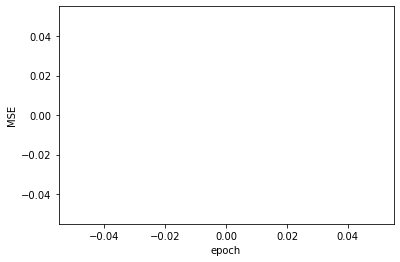

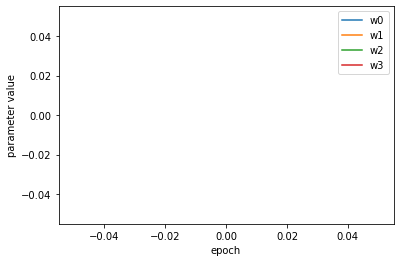

In [133]:
learning_rates = [0, .0001, .001, .01, 0.1, 1, 10, 100]
regularizations = [0,10,100]
mse = 10
for l in learning_rates:
    for r in regularizations:
        regression = Regression(learning_rate = l, regularization= r, n_epoch=15)
        regression.fit(X,y, plot = True)
        



0.027391087575201017


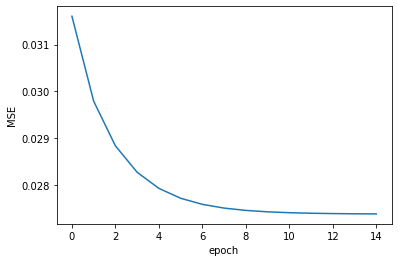

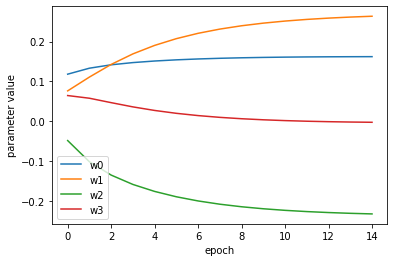

In [134]:
# best mse/parameter value plots:
Regression(learning_rate = .01, regularization= 0, n_epoch=15).fit(X,y, plot = True)

0.030495991520073523


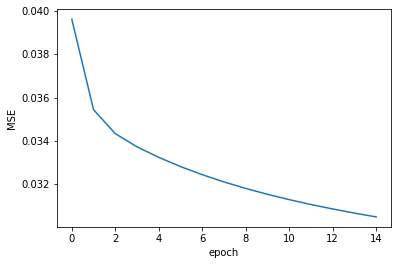

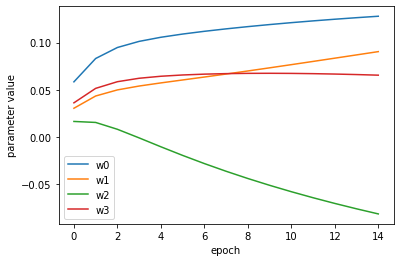

In [136]:
# second best mse/parameter value plots:
Regression(learning_rate = .001, regularization= 0, n_epoch=15).fit(X,y, plot = True)